In [1]:
# Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_path = r"C:\Users\91832\Downloads\german_credit - german_credit.csv.csv"
df = pd.read_csv(file_path)

print(df.head(5))

   Creditability  Account Balance  Duration of Credit (month)  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment Status of Previous Credit  Purpose  Credit Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value Savings/Stocks  Length of current employment  Instalment per cent  \
0                     1                             2                    4   
1                     1                             3               

In [2]:
df.isnull().any()

Creditability                        False
Account Balance                      False
Duration of Credit (month)           False
Payment Status of Previous Credit    False
Purpose                              False
Credit Amount                        False
Value Savings/Stocks                 False
Length of current employment         False
Instalment per cent                  False
Sex & Marital Status                 False
Guarantors                           False
Duration in Current address          False
Most valuable available asset        False
Age (years)                          False
Concurrent Credits                   False
Type of apartment                    False
No of Credits at this Bank           False
Occupation                           False
No of dependents                     False
Telephone                            False
Foreign Worker                       False
dtype: bool

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

In [35]:
df_clean=df.drop(['Duration of Credit (month)','Instalment per cent','Duration in Current address','Most valuable available asset','Age (years)','Type of apartment','Occupation'
,'No of dependents','Telephone','Foreign Worker','Guarantors','Sex & Marital Status'],axis=1)
df_clean

,Creditability,Account Balance,Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Concurrent Credits,No of Credits at this Bank
0,1,1,4,2,1049,1,2,3,1
1,1,1,4,0,2799,1,3,3,2
2,1,2,2,9,841,2,4,3,1
3,1,1,4,0,2122,1,3,3,2
4,1,1,4,0,2171,1,3,1,2
...,...,...,...,...,...,...,...,...,...
995,0,1,2,3,1987,1,3,3,1
996,0,1,2,0,2303,1,5,3,1
997,0,4,4,0,12680,5,5,3,1
998,0,2,2,3,6468,5,1,3,1


In [36]:
 df_clean.isnull().sum()

Creditability                        0
Account Balance                      0
Payment Status of Previous Credit    0
Purpose                              0
Credit Amount                        0
Value Savings/Stocks                 0
Length of current employment         0
Concurrent Credits                   0
No of Credits at this Bank           0
dtype: int64

In [37]:
df_clean['Creditability'].unique()

array([1, 0], dtype=int64)

In [38]:
df_clean['Account Balance'].unique()

array([1, 2, 4, 3], dtype=int64)

In [39]:
Xall=df_clean.drop('Creditability',axis=1)
yall=df_clean['Creditability']

In [40]:
yall

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Creditability, Length: 1000, dtype: int64

## Ensemble

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict

# Split the data into training and testing sets
X, Xt, y, yt = train_test_split(Xall, yall, test_size=0.2, random_state=0)

# Scale the features using MinMaxScaler
scl = MinMaxScaler().fit(X)
X = scl.transform(X)
Xt = scl.transform(Xt)

# Logistic Regression
yp_logreg = cross_val_predict(LogisticRegression(random_state=0), X, y, cv=2)
train_acc_logreg = sum(yp_logreg == y) / len(y)
clf_logreg = LogisticRegression(random_state=0).fit(X, y)
yp_test_logreg = clf_logreg.predict(Xt)
test_acc_logreg = sum(yp_test_logreg == yt) / len(yt)

# Decision Tree
yp_dt = cross_val_predict(DecisionTreeClassifier(random_state=0), X, y, cv=2)
train_acc_dt = sum(yp_dt == y) / len(y)
clf_dt = DecisionTreeClassifier(random_state=0).fit(X, y)
yp_test_dt = clf_dt.predict(Xt)
test_acc_dt = sum(yp_test_dt == yt) / len(yt)

# Random Forest
yp_rf = cross_val_predict(RandomForestClassifier(random_state=0), X, y, cv=2)
train_acc_rf = sum(yp_rf == y) / len(y)
clf_rf = RandomForestClassifier(random_state=0).fit(X, y)
yp_test_rf = clf_rf.predict(Xt)
test_acc_rf = sum(yp_test_rf == yt) / len(yt)

# k-Nearest Neighbors (kNN)
from sklearn.neighbors import KNeighborsClassifier
yp_knn = cross_val_predict(KNeighborsClassifier(), X, y, cv=2)
train_acc_knn = sum(yp_knn == y) / len(y)
clf_knn = KNeighborsClassifier().fit(X, y)
yp_test_knn = clf_knn.predict(Xt)
test_acc_knn = sum(yp_test_knn == yt) / len(yt)

# Output results
print("Logistic Regression:")
print(f"Training Accuracy: {train_acc_logreg:.2f}")
print(f"Testing Accuracy: {test_acc_logreg:.2f}\n")

print("Decision Tree:")
print(f"Training Accuracy: {train_acc_dt:.2f}")
print(f"Testing Accuracy: {test_acc_dt:.2f}\n")

print("Random Forest:")
print(f"Training Accuracy: {train_acc_rf:.2f}")
print(f"Testing Accuracy: {test_acc_rf:.2f}\n")

print("k-Nearest Neighbors (kNN):")
print(f"Training Accuracy: {train_acc_knn:.2f}")
print(f"Testing Accuracy: {test_acc_knn:.2f}\n")


Logistic Regression:
Training Accuracy: 0.74
Testing Accuracy: 0.71

Decision Tree:
Training Accuracy: 0.66
Testing Accuracy: 0.65

Random Forest:
Training Accuracy: 0.72
Testing Accuracy: 0.77

k-Nearest Neighbors (kNN):
Training Accuracy: 0.70
Testing Accuracy: 0.71



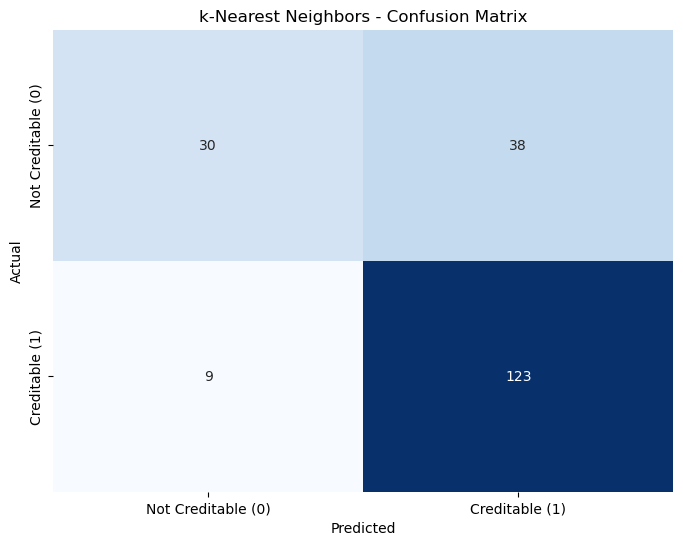

Unique Predicted Values: [0 1]


In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(yt, y_pred_rf)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Creditable (0)', 'Creditable (1)'],
            yticklabels=['Not Creditable (0)', 'Creditable (1)'])
plt.title('k-Nearest Neighbors - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Unique Predicted Values:", np.unique(y_pred_rf))


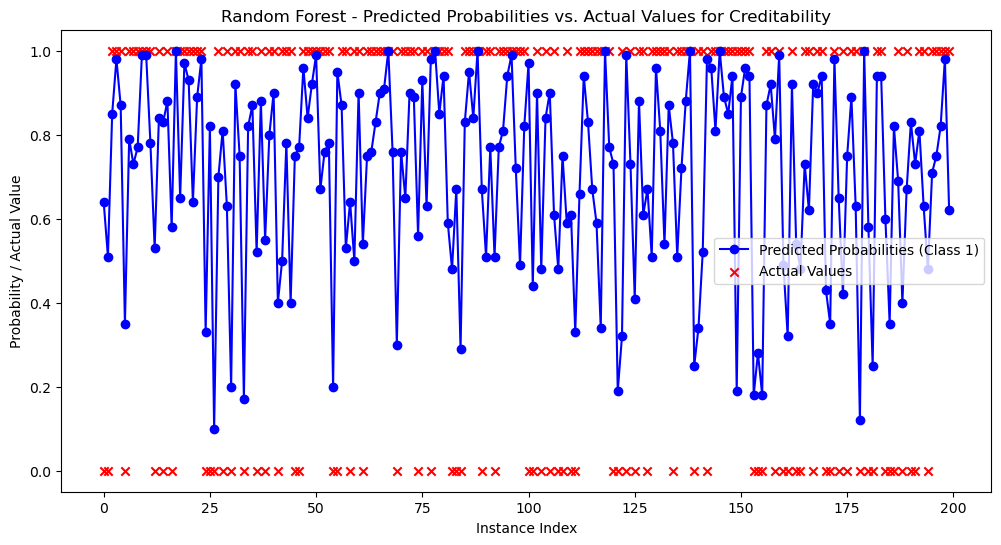

In [50]:
# Get predicted probabilities for class 1 (Creditable)
y_prob_rf = rf_model.predict_proba(Xt)[:, 1]

# Create a line plot of predicted probabilities
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_prob_rf)), y_prob_rf, label='Predicted Probabilities (Class 1)', marker='o', linestyle='-', color='blue')
plt.scatter(range(len(yt)), yt, label='Actual Values', color='red', marker='x')
plt.title('Random Forest - Predicted Probabilities vs. Actual Values for Creditability')
plt.xlabel('Instance Index')
plt.ylabel('Probability / Actual Value')
plt.legend()
plt.show()


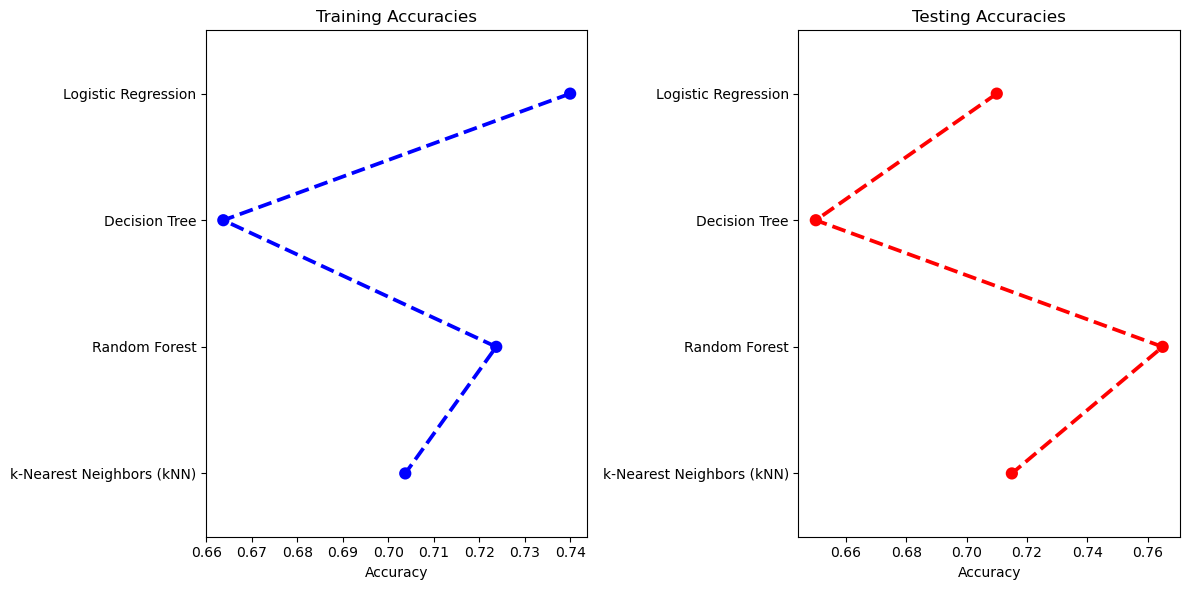

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Results
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'k-Nearest Neighbors (kNN)']
training_accuracies = [train_acc_logreg, train_acc_dt, train_acc_rf, train_acc_knn]
testing_accuracies = [test_acc_logreg, test_acc_dt, test_acc_rf, test_acc_knn]

# Plotting
plt.figure(figsize=(12, 6))

# Training Accuracy
plt.subplot(1, 2, 1)
sns.pointplot(x=training_accuracies, y=models, markers="o", linestyles="--", color='b')
plt.title('Training Accuracies')
plt.xlabel('Accuracy')

# Testing Accuracy
plt.subplot(1, 2, 2)
sns.pointplot(x=testing_accuracies, y=models, markers="o", linestyles="--", color='r')
plt.title('Testing Accuracies')
plt.xlabel('Accuracy')

plt.tight_layout()
plt.show()


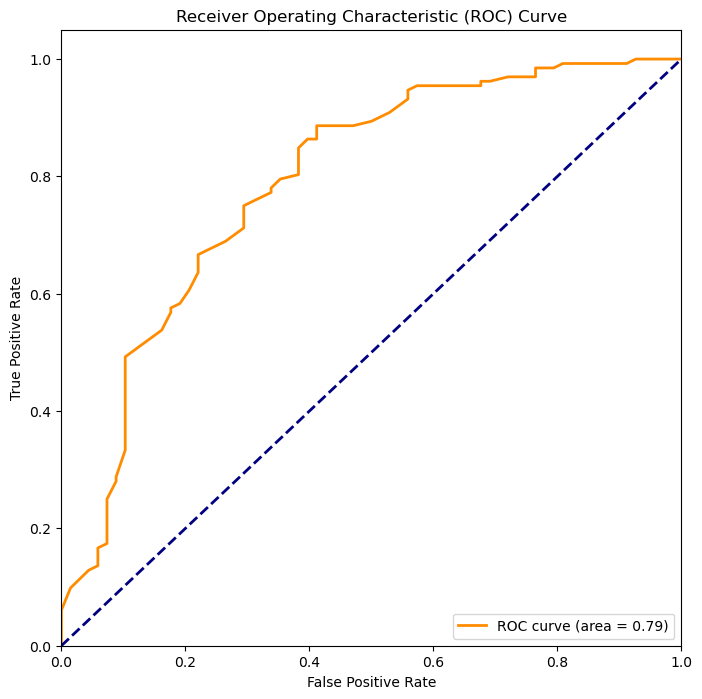

Testing Accuracy: 0.77
Confusion Matrix:
[[ 30  38]
 [  9 123]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.44      0.56        68
           1       0.76      0.93      0.84       132

    accuracy                           0.77       200
   macro avg       0.77      0.69      0.70       200
weighted avg       0.77      0.77      0.74       200



In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xall, yall, test_size=0.2, random_state=0)

# Scale the features using MinMaxScaler
scl = MinMaxScaler().fit(X_train)
X_train = scl.transform(X_train)
X_test = scl.transform(X_test)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)

# Predict creditability on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

#ROC 
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the results
print(f"Testing Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


### Account Balance

In [73]:
percentage_account_balance = df['Account Balance'].value_counts(normalize=True) * 100
print(percentage_account_balance)

4    39.4
1    27.4
2    26.9
3     6.3
Name: Account Balance, dtype: float64


200 Euros and above    39.4
No Account             27.4
None                   26.9
Below 200 Euros         6.3
Name: Account Balance, dtype: float64


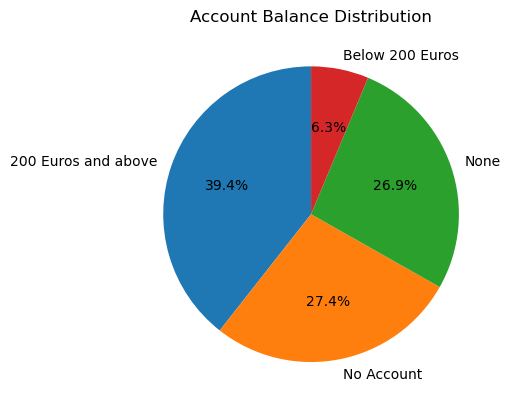

In [7]:
# Replace values in the 'Account Balance' column
df['Account Balance'] = df['Account Balance'].replace({1: 'No Account', 2: 'None', 3: 'Below 200 Euros', 4: '200 Euros and above'})

# Calculate the percentage of each category
percentage_account_balance = df['Account Balance'].value_counts(normalize=True) * 100
print(percentage_account_balance)

import matplotlib.pyplot as plt

labels = ['200 Euros and above', 'No Account', 'None', 'Below 200 Euros']
values = [39.4, 27.4, 26.9, 6.3]

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Account Balance Distribution')
plt.show()

### Payment Status of Previous Credit

In [9]:
percentage_payment_status = df['Payment Status of Previous Credit'].value_counts(normalize=True)*100
print(percentage_payment_status)

2    53.0
4    29.3
3     8.8
1     4.9
0     4.0
Name: Payment Status of Previous Credit, dtype: float64


Paid Up                            53.0
Previous Credits Paid              29.3
No Problem with Current Credits     8.8
Other Credits                       4.9
Delayed                             4.0
Name: Payment Status of Previous Credit, dtype: float64


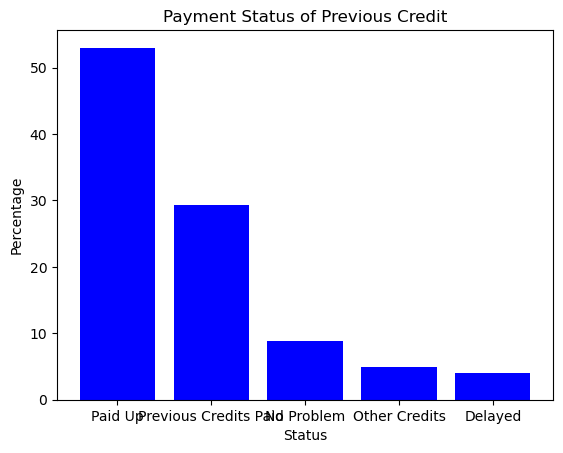

In [10]:
df['Payment Status of Previous Credit'] = df['Payment Status of Previous Credit'].replace({0:'Delayed',1 : 'Other Credits', 2 : 'Paid Up',
                                                          3: 'No Problem with Current Credits',4:'Previous Credits Paid'})
percentage_payment_status = df['Payment Status of Previous Credit'].value_counts(normalize=True)*100
print(percentage_payment_status)


import matplotlib.pyplot as plt

labels = ['Paid Up', 'Previous Credits Paid', 'No Problem', 'Other Credits', 'Delayed']
values = [53.0, 29.3, 8.8, 4.9, 4.0]

plt.bar(labels, values, color='blue')
plt.title('Payment Status of Previous Credit')
plt.xlabel('Status')
plt.ylabel('Percentage')
plt.show()

### Value Savings/Stocks

In [5]:
percentage_value_savings_stocks = df['Value Savings/Stocks'].value_counts(normalize=True)*100
print(percentage_value_savings_stocks)

1    60.3
5    18.3
2    10.3
3     6.3
4     4.8
Name: Value Savings/Stocks, dtype: float64


None                60.3
Above 1000 Euros    18.3
Below 100 Euros     10.3
[100, 500)           6.3
[500, 1000)          4.8
Name: Value Savings/Stocks, dtype: float64


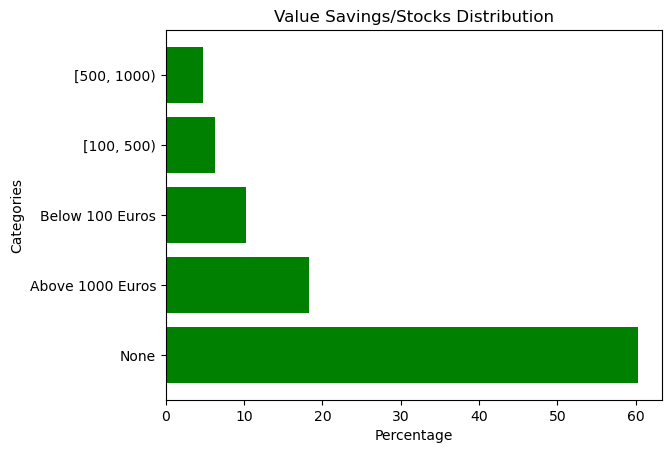

In [11]:
df['Value Savings/Stocks'] = df['Value Savings/Stocks'].replace({1 : 'None', 2 : 'Below 100 Euros',
                                                          3: '[100, 500)',4:'[500, 1000)',5:'Above 1000 Euros'})
percentage_value_savings_stocks = df['Value Savings/Stocks'].value_counts(normalize=True)*100
print(percentage_value_savings_stocks)

import matplotlib.pyplot as plt

categories = ['None', 'Above 1000 Euros', 'Below 100 Euros', '[100, 500)', '[500, 1000)']
values = [60.3, 18.3, 10.3, 6.3, 4.8]

plt.barh(categories, values, color='green')
plt.title('Value Savings/Stocks Distribution')
plt.xlabel('Percentage')
plt.ylabel('Categories')
plt.show()

### Length of Current Employment

In [14]:
percentage_length_of_current_employment = df['Length of current employment'].value_counts(normalize=True)*100
print(percentage_length_of_current_employment)

3    33.9
5    25.3
4    17.4
2    17.2
1     6.2
Name: Length of current employment, dtype: float64


[1, 4)        33.9
Above 7       25.3
[4, 7)        17.4
<1 Year       17.2
Unemployed     6.2
Name: Length of current employment, dtype: float64


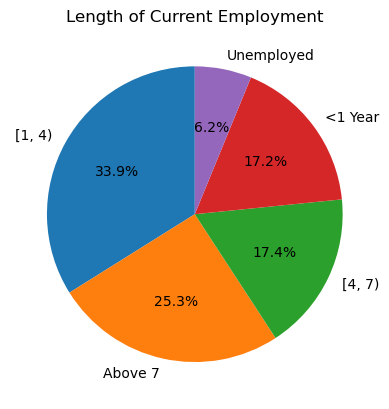

In [12]:
df['Length of current employment'] = df['Length of current employment'].replace({1 : 'Unemployed', 2 : '<1 Year',
                                                          3: '[1, 4)',4:'[4, 7)',5:'Above 7'})
percentage_length_of_current_employment = df['Length of current employment'].value_counts(normalize=True)*100
print(percentage_length_of_current_employment)

import matplotlib.pyplot as plt

categories = ['[1, 4)', 'Above 7', '[4, 7)', '<1 Year', 'Unemployed']
values = [33.9, 25.3, 17.4, 17.2, 6.2]

plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=90)
plt.title('Length of Current Employment')
plt.show()

### Number of Credits

In [17]:
percentage_number_of_credits = df['No of Credits at this Bank'].value_counts(normalize=True)*100
print(percentage_number_of_credits)

1    63.3
2    33.3
3     2.8
4     0.6
Name: No of Credits at this Bank, dtype: float64


In [16]:
df['No of Credits at this Bank'] = df['No of Credits at this Bank'].replace({1 : '1', 2 : '2 or 3', 3: '4 or 5',4:'Above 6'})
percentage_number_of_credits = df['No of Credits at this Bank'].value_counts(normalize=True)*100
print(percentage_number_of_credits)


1          63.3
2 or 3     33.3
4 or 5      2.8
Above 6     0.6
Name: No of Credits at this Bank, dtype: float64


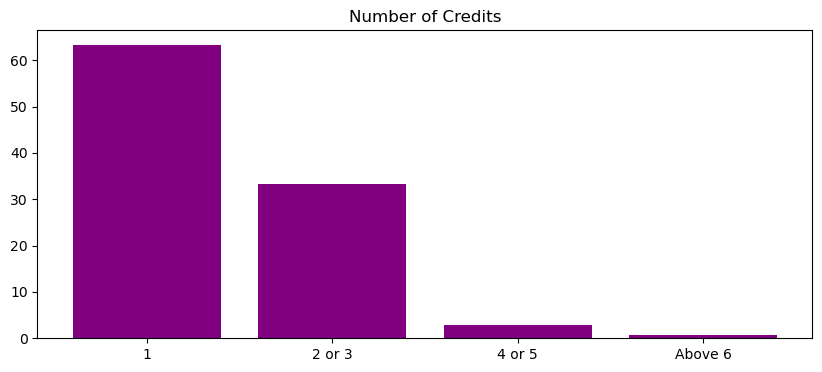

In [7]:
import matplotlib.pyplot as plt
import numpy as np

categories = ['1', '2 or 3', '4 or 5', 'Above 6']
values = [63.3, 33.3, 2.8, 0.6]

fig, (ax1) = plt.subplots(1, figsize=(10, 4))

# Number of Credits
ax1.bar(categories, values, color='purple')
ax1.set_title('Number of Credits')


plt.show()

### Concurrent Credits

In [20]:
percentage_concurrent_credits = df['Concurrent Credits'].value_counts(normalize=True)*100
print(percentage_concurrent_credits)

3    81.4
1    13.9
2     4.7
Name: Concurrent Credits, dtype: float64


In [3]:
df['Concurrent Credits'] = df['Concurrent Credits'].replace({1 : 'Other Banks', 2 : 'Dept. Store', 3: 'None'})
percentage_concurrent_credits = df['Concurrent Credits'].value_counts(normalize=True)*100
print(percentage_concurrent_credits)

None           81.4
Other Banks    13.9
Dept. Store     4.7
Name: Concurrent Credits, dtype: float64


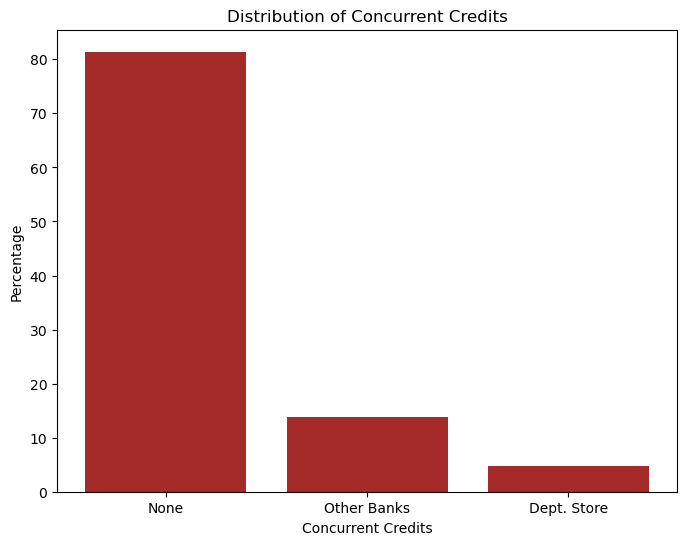

In [11]:
import matplotlib.pyplot as plt

# Data for Concurrent Credits
concurrent_credits_data = {'None': 81.4, 'Other Banks': 13.9, 'Dept. Store': 4.7}

# Plotting the bar plot
plt.figure(figsize=(8, 6))
plt.bar(concurrent_credits_data.keys(), concurrent_credits_data.values(), color='brown')
plt.xlabel('Concurrent Credits')
plt.ylabel('Percentage')
plt.title('Distribution of Concurrent Credits')
plt.show()

### Credit Amount

In [21]:
df['Concurrent Credits'] = df['Concurrent Credits'].replace({1 : 'Other Banks', 2 : 'Dept. Store', 3: 'None'})
percentage_concurrent_credits = df['Concurrent Credits'].value_counts(normalize=True)*100
print(percentage_concurrent_credits)

None           81.4
Other Banks    13.9
Dept. Store     4.7
Name: Concurrent Credits, dtype: float64


In [22]:
percentage_credit_amount = df['Credit Amount'].value_counts(normalize=True)*100
print(percentage_credit_amount)

1258     0.3
1275     0.3
1393     0.3
1262     0.3
1478     0.3
        ... 
1346     0.1
10477    0.1
2924     0.1
1961     0.1
6350     0.1
Name: Credit Amount, Length: 923, dtype: float64


### Type of Apartment

In [20]:
percentage_apartment_type = df['Type of apartment'].value_counts(normalize=True)*100
print(percentage_apartment_type)

2    71.4
1    17.9
3    10.7
Name: Type of apartment, dtype: float64


Rented    71.4
Free      17.9
Owned     10.7
Name: Type of apartment, dtype: float64


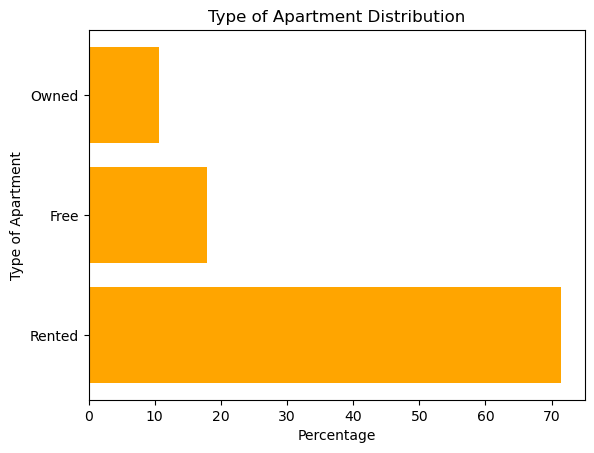

In [25]:
df['Type of apartment'] = df['Type of apartment'].replace({1 : 'Free', 2 : 'Rented', 3: 'Owned'})
percentage_apartment_type = df['Type of apartment'].value_counts(normalize=True)*100
print(percentage_apartment_type)

import matplotlib.pyplot as plt

labels = ['Rented', 'Free', 'Owned']
values = [71.4, 17.9, 10.7]

plt.barh(labels, values, color='orange')
plt.title('Type of Apartment Distribution')
plt.xlabel('Percentage')
plt.ylabel('Type of Apartment')
plt.show()

### Most Valuable Asset

In [26]:
percentage_most_valuable_asset = df['Most valuable available asset'].value_counts(normalize=True)*100
print(percentage_most_valuable_asset)

3    33.2
1    28.2
2    23.2
4    15.4
Name: Most valuable available asset, dtype: float64


Life Insurance    33.2
None              28.2
Car               23.2
Real Estate       15.4
Name: Most valuable available asset, dtype: float64


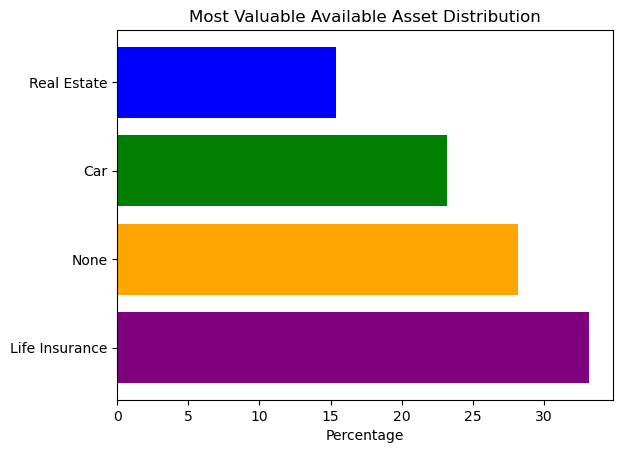

In [29]:
df['Most valuable available asset'] = df['Most valuable available asset'].replace({1 : 'None', 2 : 'Car', 3: 'Life Insurance',4:'Real Estate'})
percentage_most_valuable_asset = df['Most valuable available asset'].value_counts(normalize=True)*100
print(percentage_most_valuable_asset)

import matplotlib.pyplot as plt

assets = ['Life Insurance', 'None', 'Car', 'Real Estate']
values = [33.2, 28.2, 23.2, 15.4]

fig, ax = plt.subplots()
colors = ['purple', 'orange', 'green', 'blue']

ax.barh(assets, values, color=colors)
ax.set_title('Most Valuable Available Asset Distribution')
ax.set_xlabel('Percentage')

plt.show()

### Guarantors

In [3]:
percentage_guarantors = df['Guarantors'].value_counts(normalize=True)*100
print(percentage_guarantors)

1    90.7
3     5.2
2     4.1
Name: Guarantors, dtype: float64


None            90.7
Guarantor        5.2
Co-applicant     4.1
Name: Guarantors, dtype: float64


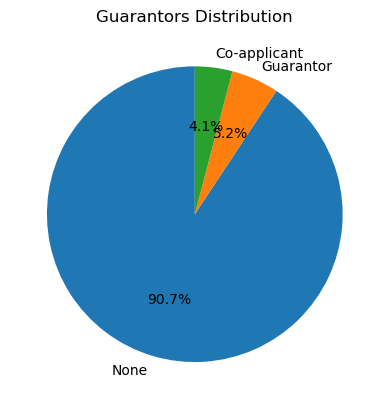

In [6]:
df['Guarantors'] = df['Guarantors'].replace({1 : 'None', 2 : 'Co-applicant', 3: 'Guarantor'})
percentage_guarantors = df['Guarantors'].value_counts(normalize=True)*100
print(percentage_guarantors)

import matplotlib.pyplot as plt

labels = ['None', 'Guarantor', 'Co-applicant']
values = [90.7, 5.2, 4.1]

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Guarantors Distribution')
plt.show()

### Purpose for Credit

In [8]:
percentage_purpose = df['Purpose'].value_counts(normalize=True)*100
print(percentage_purpose)

3     28.0
0     23.4
2     18.1
1     10.3
9      9.7
6      5.0
5      2.2
10     1.2
4      1.2
8      0.9
Name: Purpose, dtype: float64


Furniture     28.0
Other         23.4
Used Car      18.1
New Car       10.3
Retraining     9.7
Repair         5.0
Appliances     2.2
Business       1.2
Radio/TV       1.2
Vacation       0.9
Name: Purpose, dtype: float64


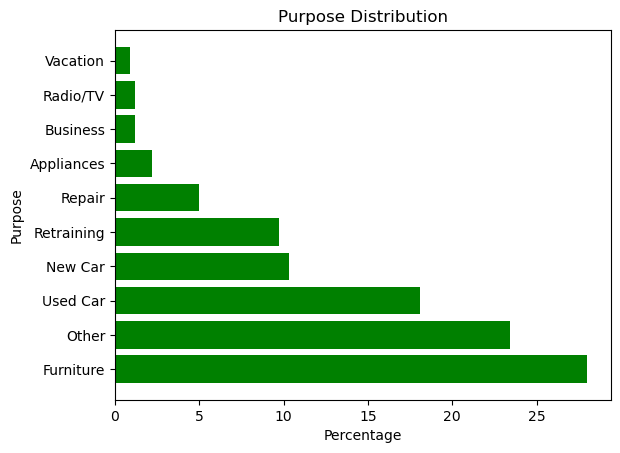

In [11]:
df['Purpose'] = df['Purpose'].replace({0:'Other',1 : 'New Car', 2 : 'Used Car',
                               3:'Furniture',4:'Radio/TV',5:'Appliances',
                               6:'Repair',8:'Vacation',9:'Retraining',10:'Business'})
percentage_purpose = df['Purpose'].value_counts(normalize=True)*100
print(percentage_purpose)

import matplotlib.pyplot as plt

purposes = ['Furniture', 'Other', 'Used Car', 'New Car', 'Retraining', 'Repair', 'Appliances', 'Business', 'Radio/TV', 'Vacation']
values = [28.0, 23.4, 18.1, 10.3, 9.7, 5.0, 2.2, 1.2, 1.2, 0.9]

plt.barh(purposes, values, color='green')
plt.title('Purpose Distribution')
plt.xlabel('Percentage')
plt.ylabel('Purpose')
plt.show()

### Occupation

In [2]:
percentage_occupation = df['Occupation'].value_counts(normalize=True)*100
print(percentage_occupation)

3    63.0
2    20.0
4    14.8
1     2.2
Name: Occupation, dtype: float64


Skilled                         63.0
Unskilled Permanent Resident    20.0
Executive                       14.8
Unemployed, unskilled            2.2
Name: Occupation, dtype: float64


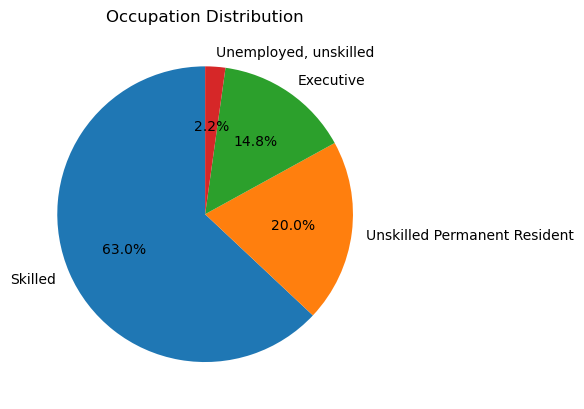

In [4]:
df['Occupation'] = df['Occupation'].replace({1 : 'Unemployed, unskilled', 2 : 'Unskilled Permanent Resident', 3: 'Skilled',4:'Executive'})
percentage_occupation = df['Occupation'].value_counts(normalize=True)*100
print(percentage_occupation)

import matplotlib.pyplot as plt

labels = ['Skilled', 'Unskilled Permanent Resident', 'Executive', 'Unemployed, unskilled']
values = [63.0, 20.0, 14.8, 2.2]

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Occupation Distribution')
plt.show()

In [9]:
import pandas as pd
from IPython.display import FileLink
# Data for each category
account_balance_data = {'Category': ['200 Euros and above', 'No Account', 'None', 'Below 200 Euros'],
                         'Percentage': [39.4, 27.4, 26.9, 6.3]}

payment_status_data = {'Category': ['Paid Up', 'Previous Credits Paid', 'No Problem', 'Other Credits', 'Delayed'],
                        'Percentage': [53.0, 29.3, 8.8, 4.9, 4.0]}

value_savings_data = {'Category': ['None', 'Above 1000 Euros', 'Below 100 Euros', '[100, 500)', '[500, 1000)'],
                      'Percentage': [60.3, 18.3, 10.3, 6.3, 4.8]}

employment_length_data = {'Category': ['[1, 4)', 'Above 7', '[4, 7)', '<1 Year', 'Unemployed'],
                          'Percentage': [33.9, 25.3, 17.4, 17.2, 6.2]}

number_of_credits_data = {'Category': ['1', '2 or 3', '4 or 5', 'Above 6'],
                          'Percentage': [63.3, 33.3, 2.8, 0.6]}

concurrent_credits_data = {'Category': ['1', '2 or 3', '4 or 5', 'Above 6'],
                            'Percentage': [63.3, 33.3, 2.8, 0.6]}

type_of_apartment_data = {'Category': ['Rented', 'Free', 'Owned'],
                           'Percentage': [71.4, 17.9, 10.7]}

most_valuable_asset_data = {'Category': ['Life Insurance', 'None', 'Car', 'Real Estate'],
                            'Percentage': [33.2, 28.2, 23.2, 15.4]}

guarantors_data = {'Category': ['None', 'Guarantor', 'Co-applicant'],
                   'Percentage': [90.7, 5.2, 4.1]}

purpose_data = {'Category': ['Furniture', 'Other', 'Used Car', 'New Car', 'Retraining', 'Repair', 'Appliances', 'Business', 'Radio/TV', 'Vacation'],
                'Percentage': [28.0, 23.4, 18.1, 10.3, 9.7, 5.0, 2.2, 1.2, 1.2, 0.9]}

occupation_data = {'Category': ['Skilled', 'Unskilled Permanent Resident', 'Executive', 'Unemployed, unskilled'],
                   'Percentage': [63.0, 20.0, 14.8, 2.2]}

# Create DataFrames
df_account_balance = pd.DataFrame(account_balance_data)
df_payment_status = pd.DataFrame(payment_status_data)
df_value_savings = pd.DataFrame(value_savings_data)
df_employment_length = pd.DataFrame(employment_length_data)
df_number_of_credits = pd.DataFrame(number_of_credits_data)
df_concurrent_credits = pd.DataFrame(concurrent_credits_data)
df_type_of_apartment = pd.DataFrame(type_of_apartment_data)
df_most_valuable_asset = pd.DataFrame(most_valuable_asset_data)
df_guarantors = pd.DataFrame(guarantors_data)
df_purpose = pd.DataFrame(purpose_data)
df_occupation = pd.DataFrame(occupation_data)

# Specify the file path
file_path = 'credit_data_tableau.csv'

# Save to CSV
df_account_balance.to_csv(file_path, mode='w', header=True, index=False)
df_payment_status.to_csv(file_path, mode='a', header=False, index=False)
df_value_savings.to_csv(file_path, mode='a', header=False, index=False)
df_employment_length.to_csv(file_path, mode='a', header=False, index=False)
df_number_of_credits.to_csv(file_path, mode='a', header=False, index=False)
df_concurrent_credits.to_csv(file_path, mode='a', header=False, index=False)
df_type_of_apartment.to_csv(file_path, mode='a', header=False, index=False)
df_most_valuable_asset.to_csv(file_path, mode='a', header=False, index=False)
df_guarantors.to_csv(file_path, mode='a', header=False, index=False)
df_purpose.to_csv(file_path, mode='a', header=False, index=False)
df_occupation.to_csv(file_path, mode='a', header=False, index=False)

print(f'The file {file_path} has been created successfully.')

# Display a download link
FileLink(file_path)

The file credit_data_tableau.csv has been created successfully.


C:\Users\91832\credit_data_tableau.csv